In [3]:
import pandas as pd

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Breast_cancer_data.csv')

In [ ]:
data1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
print(data1.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [ ]:
type(data1)

pandas.core.frame.DataFrame

In [ ]:
data1.shape

(569, 6)

In [ ]:
data1.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data1.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
data1.isnull().any()

,0
mean_radius,False
mean_texture,False
mean_perimeter,False
mean_area,False
mean_smoothness,False
diagnosis,False


In [ ]:
data1["diagnosis"].describe()

,diagnosis
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
data1["diagnosis"].unique()

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
prediction = data1.drop("diagnosis",axis=1)
disease = data1["diagnosis"]
X_train,X_test,y_train,y_test = train_test_split(prediction,disease,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(455, 5)

In [ ]:
X_test.shape

(114, 5)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred1 = nb.predict(X_test)
y_pred1.shape

(114,)

In [ ]:
score_nb = round(accuracy_score(y_pred1,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 92.98 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(y_pred_dt.shape)

(114,)


In [ ]:
score_dt1 = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy using Decision Tree is: "+str(score_dt1)+" %")

The accuracy using Decision Tree is: 88.6 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(114,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 91.23 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(114,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 87.72 %


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=50, random_state=42)
adc.fit(X_train,y_train)
Y_pred_adc=adc.predict(X_test)

In [ ]:
Y_pred_adc.shape

(114,)

In [ ]:
from sklearn.metrics import accuracy_score
score_adc = round(accuracy_score(Y_pred_adc,y_test)*100,2)

print("The accuracy score achieved using AdaBoost is: "+str(score_adc)+" %")

The accuracy score achieved using AdaBoost is: 92.11 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(prediction,disease, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred)*100,2)
print(f'Logistic Regression Accuracy: {accuracy}')

Logistic Regression Accuracy: (92.98245614035088, 2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=34)

In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score using Random Forest is: "+str(score_rf)+" %")

The accuracy score using Random Forest is: 97.37 %


In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'breast_cancer_rf.pkl')
print("Model saved as breast_cancer_rf.pkl")

Model saved as breast_cancer_rf.pkl


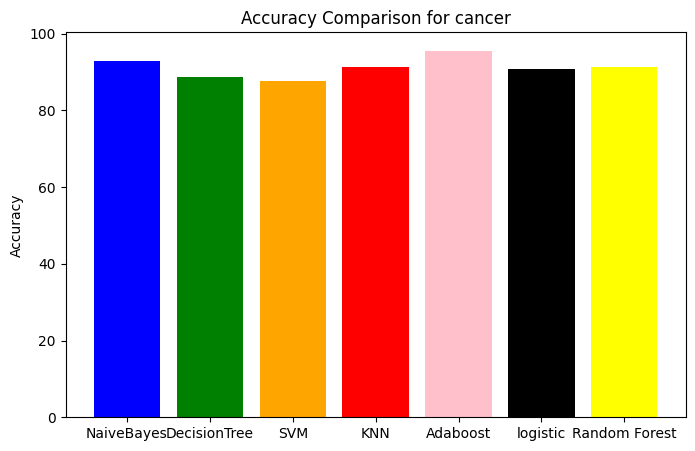

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
algorithms = ['NaiveBayes', 'DecisionTree','SVM','KNN','Adaboost','logistic','Random Forest']
accuracy_scores = [92.98,88.6,87.72,91.23,95.61,90.74,91.23]
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(algorithms, accuracy_scores, color=['blue', 'green', 'orange','red','pink','black','yellow'])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for cancer')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data2 = pd.read_csv('/content/drive/MyDrive/diabetes1.csv')

In [5]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data2.shape

(768, 9)

In [7]:
data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data2.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [9]:
data2["Outcome"].describe()

,Outcome
count,768.000000
mean,0.348958
std,0.476951
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
data2["Outcome"].unique()

array([1, 0])

In [11]:
from sklearn.model_selection import train_test_split
prediction = data2.drop("Outcome",axis=1)
disease = data2["Outcome"]
X_train1,X_test1,y_train1,y_test1 = train_test_split(prediction,disease,test_size=0.20,random_state=0)

In [12]:
X_train1.shape

(614, 8)

In [13]:
X_test1.shape

(154, 8)

In [14]:
y_train1.shape

(614,)

In [15]:
y_test1.shape

(154,)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train1,y_train1)
y_pred_nb = nb.predict(X_test1)
y_pred_nb.shape

(154,)

In [ ]:
score_nb1 = round(accuracy_score(y_pred_nb,y_test1)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb1)+" %")

The accuracy score achieved using Naive Bayes is: 79.22 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train1,y_train1)
    y_pred_dt1 = dt.predict(X_test1)
    current_accuracy = round(accuracy_score(y_pred_dt1,y_test1)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train1,y_train1)
y_pred_dt1 = dt.predict(X_test1)
print(y_pred_dt1.shape)

(154,)


In [ ]:
score_dt2 = round(accuracy_score(y_pred_dt1,y_test1)*100,2)
print("The accuracy using Decision Tree is: "+str(score_dt2)+" %")

The accuracy using Decision Tree is: 81.82 %


In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train1, y_train1)
Y_pred_svm1 = sv.predict(X_test1)

In [ ]:
Y_pred_svm1.shape

(154,)

In [ ]:
score_svm1 = round(accuracy_score(Y_pred_svm1,y_test1)*100,2)
print("The accuracy using SVM is: "+str(score_svm1)+" %")

The accuracy using SVM is: 81.82 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train1,y_train1)
Y_pred_knn1=knn.predict(X_test1)

In [ ]:
Y_pred_knn1.shape

(154,)

In [ ]:
score_knn1 = round(accuracy_score(Y_pred_knn1,y_test1)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn1)+" %")

The accuracy score achieved using KNN is: 77.92 %


In [16]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=50, random_state=42)
adc.fit(X_train1,y_train1)
Y_pred_adc1=adc.predict(X_test1)

In [17]:
Y_pred_adc1.shape

(154,)

In [19]:
from sklearn.metrics import accuracy_score
score_adc1 = round(accuracy_score(Y_pred_adc1,y_test1)*100,2)
print("The accuracy score achieved using Adaboost is: "+str(score_adc1)+" %")

The accuracy score achieved using Adaboost is: 78.57 %


In [ ]:
  from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(prediction,disease, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train1, y_train1)
y_pred1 = logreg_model.predict(X_test1)
accuracy = (accuracy_score(y_test1, y_pred1)*100,2)
print(f'Logistic Regression Accuracy: {accuracy}')

Logistic Regression Accuracy: (82.46753246753246, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train1,y_train1)
    y_pred_rf1 = rf.predict(X_test1)
    current_accuracy = round(accuracy_score(y_pred_rf1,y_test1)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train1,y_train1)
y_pred_rf1 = rf.predict(X_test1)
rf.fit(X_train1,y_train1)

RandomForestClassifier(random_state=869)

In [ ]:
score_rf1 = round(accuracy_score(y_pred_rf1,y_test1)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf1)+" %")

The accuracy score achieved using Random Forest is: 83.77 %


In [ ]:
joblib.dump(rf, 'diabetes_model.pkl')
print("Model saved as diabetes_model.pkl")

Model saved as diabetes_model.pkl


In [ ]:
from google.colab import files
files.download('diabetes_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

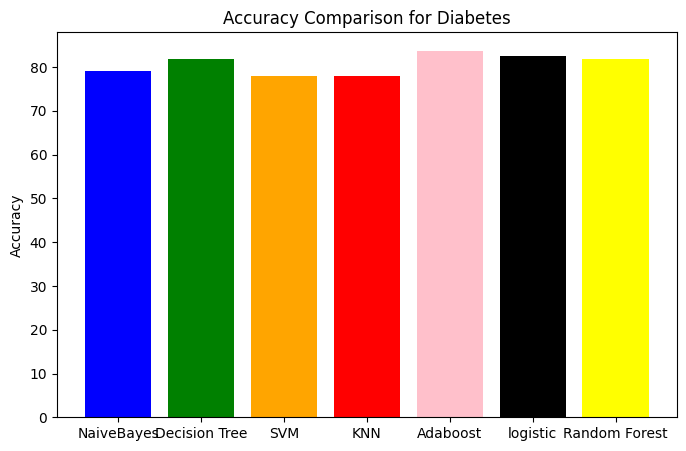

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
algorithms = ['NaiveBayes', 'Decision Tree','SVM','KNN','Adaboost','logistic','Random Forest']
accuracy_scores = [79.22,81.82,77.92,77.92,83.77,82.46,81.82]
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(algorithms, accuracy_scores, color=['blue', 'green', 'orange','red','pink','black','yellow'])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for Diabetes')
plt.show()

In [21]:
data = pd.read_csv('/content/drive/MyDrive/dataset_heart.csv')

In [22]:
data

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [23]:
data.shape

(270, 14)

In [24]:
data.isnull().any()

,0
age,False
sex,False
chest pain type,False
resting blood pressure,False
serum cholestoral,False
fasting blood sugar,False
resting electrocardiographic results,False
max heart rate,False
exercise induced angina,False
oldpeak,False


In [25]:
data.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [26]:

data["heart disease"].describe()

,heart disease
count,270.000000
mean,1.444444
std,0.497827
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [27]:
data["heart disease"].unique()

array([2, 1])

In [28]:
from sklearn.model_selection import train_test_split
prediction = data.drop("heart disease",axis=1)
disease = data["heart disease"]
X_train2,X_test2,y_train2,y_test2 = train_test_split(prediction,disease,test_size=0.20,random_state=0)

In [29]:
X_train2.shape

(216, 13)

In [30]:
X_test2.shape

(54, 13)

In [31]:
y_train2.shape

(216,)

In [32]:
y_test2.shape

(54,)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train2,y_train2)
y_pred2 = nb.predict(X_test2)
y_pred2.shape

(54,)

In [ ]:
score = round(accuracy_score(y_pred2,y_test2)*100,2)
print("The accuracy using Naive Bayes is: "+str(score)+" %")

The accuracy using Naive Bayes is: 74.07 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train2,y_train2)
    y_pred_dt2 = dt.predict(X_test2)
    current_accuracy = round(accuracy_score(y_pred_dt2,y_test2)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train2,y_train2)
y_pred_dt2 = dt.predict(X_test2)
print(y_pred_dt2.shape)

(54,)


In [ ]:
score_dt = round(accuracy_score(y_pred_dt2,y_test2)*100,2)
print("The accuracy using Decision Tree is: "+str(score_dt)+" %")

The accuracy using Decision Tree is: 85.19 %


In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train2, y_train2)
Y_pred_svm2 = sv.predict(X_test2)

In [ ]:
Y_pred_svm2.shape

(54,)

In [ ]:
score_svm2 = round(accuracy_score(Y_pred_svm2,y_test2)*100,2)
print("The accuracy using SVM is: "+str(score_svm2)+" %")

The accuracy using SVM is: 77.78 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train2,y_train2)
Y_pred_knn2=knn.predict(X_test2)

In [ ]:
Y_pred_knn2.shape

(54,)

In [ ]:
score_knn2 = round(accuracy_score(Y_pred_knn2,y_test2)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn2)+" %")

The accuracy score achieved using KNN is: 68.52 %


In [33]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=50, random_state=42)
adc.fit(X_train2,y_train2)
Y_pred_adc2=adc.predict(X_test2)

In [34]:
Y_pred_adc2.shape

(54,)

In [35]:
score_adc2 = round(accuracy_score(Y_pred_adc2,y_test2)*100,2)
print("The accuracy score achieved using Adaboost is: "+str(score_adc2)+" %")

The accuracy score achieved using Adaboost is: 74.07 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(prediction,disease, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train2, y_train2)
y_pred2 = logreg_model.predict(X_test2)
accuracy = round(accuracy_score(y_test2, y_pred2)*100,2)
print(f'Logistic Regression Accuracy: {accuracy}')

Logistic Regression Accuracy: 83.33


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train2,y_train2)
    y_pred_rf2 = rf.predict(X_test2)
    current_accuracy = round(accuracy_score(y_pred_rf2,y_test2)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train2,y_train2)
y_pred_rf2 = rf.predict(X_test2)
rf.fit(X_train2,y_train2)

RandomForestClassifier(random_state=135)

In [ ]:
y_pred_rf2.shape

(54,)

In [ ]:
score_rf2 = round(accuracy_score(y_pred_rf2,y_test2)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf2)+" %")

The accuracy score achieved using Random Forest is: 85.19 %


In [ ]:
joblib.dump(rf, 'heart_disease_model.pkl')
print("Model saved as heart_disease_model.pkl")

Model saved as heart_disease_model.pkl


In [ ]:
from google.colab import files
files.download('heart_disease_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

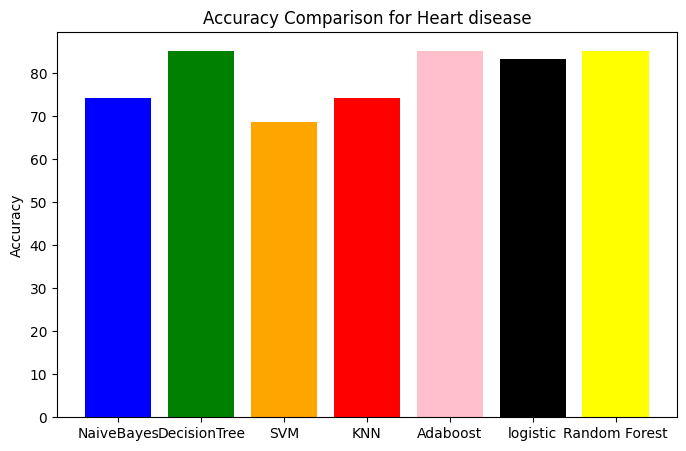

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
algorithms = ['NaiveBayes', 'DecisionTree','SVM','KNN','Adaboost','logistic','Random Forest']
accuracy_scores = [74.07,85.19,68.52,74.07,85.19,83.33,85.19]
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(algorithms, accuracy_scores, color=['blue', 'green', 'orange','red','pink','black','yellow'])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for Heart disease')
plt.show()

In [ ]:
import pickle

# assuming your trained model variable is named "ada_model" (or update to your model's name)
with open("adaboost_breast_cancer.pkl", "wb") as f:
    pickle.dump(adc, f)

In [20]:
import pickle

# assuming your trained model variable is named "ada_model" (or update to your model's name)
with open("adaboost_diabetes.pkl", "wb") as f:
    pickle.dump(adc, f)

In [36]:
import pickle

# assuming your trained model variable is named "ada_model" (or update to your model's name)
with open("adaboost_heart_disease.pkl", "wb") as f:
    pickle.dump(adc, f)